In [3]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow import keras
from tensorflow.keras import layers,Model
from keras.layers import Dense

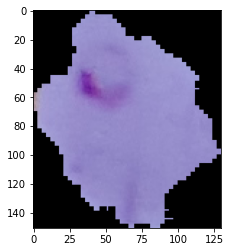

In [4]:
data='../input/cell-images/cell_images/train'
clasess=["parasitized","uninfected"]

for category in clasess:
    path=os.path.join(data,category)
    for img in os.listdir(path):
        img_array=cv.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break  

In [5]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

In [6]:
train_set=train_datagen.flow_from_directory(
'../input/cell-images/cell_images/train',
target_size=(224,224),
batch_size=128,
class_mode='sparse',
shuffle=True)

Found 24958 images belonging to 2 classes.


In [7]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255)

In [8]:
test_set=test_datagen.flow_from_directory(
'../input/cell-images/cell_images/test',
target_size=(224,224),
batch_size=128,
class_mode='sparse',
shuffle=True)

Found 2600 images belonging to 2 classes.


In [9]:
labels={0:'parasitized',
        1:'uninfected'}

In [10]:
vgg=VGG16(include_top=True,weights='imagenet')

553467904/553467096 [==============================] - 5s 0us/step


In [11]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
for layer in vgg.layers:
    layer.trainable=False

In [13]:
vgg_input=vgg.layers[0].input
vgg_output=vgg.layers[-2].output
prediction=Dense(2)(vgg_output)

In [14]:
model=Model(inputs=vgg_input,outputs=prediction)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(x=train_set,validation_data=test_set,epochs=5)

Epoch 1/5
195/195 [==============================] - 360s 2s/step - loss: 0.6941 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
195/195 [==============================] - 307s 2s/step - loss: 0.6931 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
195/195 [==============================] - 302s 2s/step - loss: 0.6931 - accuracy: 0.4971 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
195/195 [==============================] - 305s 2s/step - loss: 0.6931 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
195/195 [==============================] - 302s 2s/step - loss: 0.6931 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5000


In [19]:
model_2=keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(2,activation='softmax')
])

model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model_2.fit(train_set,validation_data=test_set,epochs=5)

Epoch 1/5
195/195 [==============================] - 298s 2s/step - loss: 0.6176 - accuracy: 0.6430 - val_loss: 0.2550 - val_accuracy: 0.9081
Epoch 2/5
195/195 [==============================] - 298s 2s/step - loss: 0.2264 - accuracy: 0.9269 - val_loss: 0.2117 - val_accuracy: 0.9265
Epoch 3/5
195/195 [==============================] - 304s 2s/step - loss: 0.1934 - accuracy: 0.9340 - val_loss: 0.1771 - val_accuracy: 0.9446
Epoch 4/5
195/195 [==============================] - 299s 2s/step - loss: 0.1677 - accuracy: 0.9449 - val_loss: 0.1889 - val_accuracy: 0.9273
Epoch 5/5
195/195 [==============================] - 291s 1s/step - loss: 0.1618 - accuracy: 0.9461 - val_loss: 0.1710 - val_accuracy: 0.9438


In [21]:
def predict(path):
    img = tf.keras.preprocessing.image.load_img(path,target_size=(224,224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = np.array([img])
    pred = labels[np.argmax(model_2.predict(img))]
    plt.imshow(img.reshape(224,224,3))
    plt.title(pred)

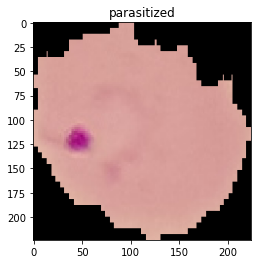

In [23]:
predict('../input/cell-images/cell_images/test/parasitized/C100P61ThinF_IMG_20150918_145422_cell_165.png')

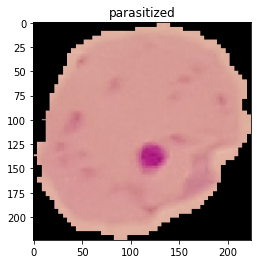

In [24]:
predict('../input/cell-images/cell_images/test/parasitized/C101P62ThinF_IMG_20150918_151239_cell_88.png')

In [ ]:
predict('../input/cell-images/cell_images/test/uninfected/C100P61ThinF_IMG_20150918_145422_cell_138.png')